## Tarea 5 y 6 (10 puntos c/u)
- Realizar análisis con MLlib de pyspark a tu conjunto de datos.
- Sube un reporte y tu código a tu repositorio.
- Presentar en la siguiente los hallazgos de tu tarea.
- Máximo 12 min de exposición por participante.

In [1]:
#- Instalar en un entorno local o ejecutar Spark en algún servidor en línea (como Google Colab)
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys

import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

import os
import urllib.request


spark= SparkSession.builder.appName("Intento 1: Spark").getOrCreate()


!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j



#https://github.com/LoredoJ08/mcd_dm_jlg.git

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,173 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,514 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-upda

In [8]:
import os
import sys

import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

import os
import urllib.request

In [2]:
url = 'https://raw.githubusercontent.com/LoredoJ08/mcd_dm_jlg/main/Tarea%201/diabetes_dataset00.csv'
file_name = 'diabetes_dataset00.csv'

# CSV
urllib.request.urlretrieve(url, file_name)
df_spark = spark.read.csv(file_name, header=True, inferSchema=True)
df_spark.show()

#Family History
#Physical Activity
#Age
#BMI
#Physical Activity
#Dietary Habit
#Blood Pressure
#Cholesterol Levels
#Waist Circumference
#Blood Glucose Levels
#Smoking Status
#Alcohol Consumption




+--------------------+---------------+--------------+--------------+---------------------+--------------+---+---+-----------------+--------------+--------------+------------------+-------------------+--------------------+---------+---------------------+--------------+-------------------+----------------------+---------------+-----------------------------+-----------------+----------------------------+-----------------+------------------+-------------------------+-------------------+---------------+------------------------+--------------------+-----------------------+---------------+------------+--------------------+
|              Target|Genetic Markers|Autoantibodies|Family History|Environmental Factors|Insulin Levels|Age|BMI|Physical Activity|Dietary Habits|Blood Pressure|Cholesterol Levels|Waist Circumference|Blood Glucose Levels|Ethnicity|Socioeconomic Factors|Smoking Status|Alcohol Consumption|Glucose Tolerance Test|History of PCOS|Previous Gestational Diabetes|Pregnancy History|W

In [3]:
columns = ['Target',
    'Family History', 'Physical Activity', 'Age', 'BMI', 'Dietary Habits', # Changed 'Dietary Habit' to 'Dietary Habits'
    'Blood Pressure', 'Cholesterol Levels', 'Waist Circumference',
    'Blood Glucose Levels', 'Smoking Status', 'Alcohol Consumption', 'Pregnancy History', 'Weight Gain During Pregnancy',
     'Cystic Fibrosis Diagnosis','Previous Gestational Diabetes'
]
df_spark = df_spark.select(columns)

# Obtener valores únicos de cada columna
unique_values = {}
for col in columns:
    unique_values[col] = df_spark.select(col).distinct().rdd.flatMap(lambda x: x).collect()

# Imprimir los valores únicos
for col, values in unique_values.items():
    print(f"{col}: {values}")

Target: ['Type 2 Diabetes', 'Type 3c Diabetes (Pancreatogenic Diabetes)', 'Gestational Diabetes', 'Wolcott-Rallison Syndrome', 'Cystic Fibrosis-Related Diabetes (CFRD)', 'Neonatal Diabetes Mellitus (NDM)', 'MODY', 'LADA', 'Type 1 Diabetes', 'Prediabetic', 'Secondary Diabetes', 'Wolfram Syndrome', 'Steroid-Induced Diabetes']
Family History: ['No', 'Yes']
Physical Activity: ['High', 'Low', 'Moderate']
Age: [31, 65, 53, 78, 34, 28, 76, 26, 27, 44, 12, 22, 47, 1, 52, 13, 16, 6, 3, 40, 20, 57, 54, 48, 5, 19, 64, 41, 43, 15, 37, 61, 9, 17, 72, 35, 59, 55, 4, 8, 39, 23, 49, 7, 51, 69, 63, 10, 77, 50, 45, 38, 73, 25, 24, 70, 62, 29, 21, 60, 32, 75, 56, 58, 11, 33, 68, 71, 14, 42, 79, 2, 30, 66, 67, 46, 0, 18, 74, 36]
BMI: [31, 34, 28, 26, 27, 12, 22, 13, 16, 20, 19, 15, 37, 17, 35, 23, 39, 38, 25, 24, 29, 21, 32, 33, 14, 30, 18, 36]
Dietary Habits: ['Unhealthy', 'Healthy']
Blood Pressure: [148, 137, 85, 65, 133, 78, 108, 115, 101, 126, 81, 76, 103, 91, 128, 122, 93, 111, 140, 132, 146, 86, 142

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
               .appName('ml') \
               .getOrCreate()

Exploración inicial

In [5]:
# Mostrar el esquema de los datos
df_spark.printSchema()


root
 |-- Target: string (nullable = true)
 |-- Family History: string (nullable = true)
 |-- Physical Activity: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Dietary Habits: string (nullable = true)
 |-- Blood Pressure: integer (nullable = true)
 |-- Cholesterol Levels: integer (nullable = true)
 |-- Waist Circumference: integer (nullable = true)
 |-- Blood Glucose Levels: integer (nullable = true)
 |-- Smoking Status: string (nullable = true)
 |-- Alcohol Consumption: string (nullable = true)
 |-- Pregnancy History: string (nullable = true)
 |-- Weight Gain During Pregnancy: integer (nullable = true)
 |-- Cystic Fibrosis Diagnosis: string (nullable = true)
 |-- Previous Gestational Diabetes: string (nullable = true)



In [6]:
df_spark.show()

+--------------------+--------------+-----------------+---+---+--------------+--------------+------------------+-------------------+--------------------+--------------+-------------------+-----------------+----------------------------+-------------------------+-----------------------------+
|              Target|Family History|Physical Activity|Age|BMI|Dietary Habits|Blood Pressure|Cholesterol Levels|Waist Circumference|Blood Glucose Levels|Smoking Status|Alcohol Consumption|Pregnancy History|Weight Gain During Pregnancy|Cystic Fibrosis Diagnosis|Previous Gestational Diabetes|
+--------------------+--------------+-----------------+---+---+--------------+--------------+------------------+-------------------+--------------------+--------------+-------------------+-----------------+----------------------------+-------------------------+-----------------------------+
|Steroid-Induced D...|            No|             High| 44| 38|       Healthy|           124|               201|            

In [12]:
df_pandas = df_spark.toPandas()
df_pandas.tail(3)


,Target,Family History,Physical Activity,Age,BMI,Dietary Habits,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Smoking Status,Alcohol Consumption,Pregnancy History,Weight Gain During Pregnancy,Cystic Fibrosis Diagnosis,Previous Gestational Diabetes
69997,Type 1 Diabetes,No,Low,11,15,Unhealthy,105,153,31,143,Smoker,High,Normal,23,Yes,No
69998,Cystic Fibrosis-Related Diabetes (CFRD),No,High,30,24,Healthy,111,177,33,126,Non-Smoker,Moderate,Normal,21,No,No
69999,LADA,Yes,Moderate,41,28,Healthy,121,180,37,117,Smoker,High,Normal,6,No,No


In [13]:
df_pandas.describe()


,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414
std,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096
min,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000
25%,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000
50%,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000
75%,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000
max,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000


In [20]:
pysparkDF = spark.createDataFrame(df_pandas)

pysparkDF.filter(pysparkDF['Physical Activity'].contains("High")).show()


+--------------------+--------------+-----------------+---+---+--------------+--------------+------------------+-------------------+--------------------+--------------+-------------------+-----------------+----------------------------+-------------------------+-----------------------------+
|              Target|Family History|Physical Activity|Age|BMI|Dietary Habits|Blood Pressure|Cholesterol Levels|Waist Circumference|Blood Glucose Levels|Smoking Status|Alcohol Consumption|Pregnancy History|Weight Gain During Pregnancy|Cystic Fibrosis Diagnosis|Previous Gestational Diabetes|
+--------------------+--------------+-----------------+---+---+--------------+--------------+------------------+-------------------+--------------------+--------------+-------------------+-----------------+----------------------------+-------------------------+-----------------------------+
|Steroid-Induced D...|            No|             High| 44| 38|       Healthy|           124|               201|            

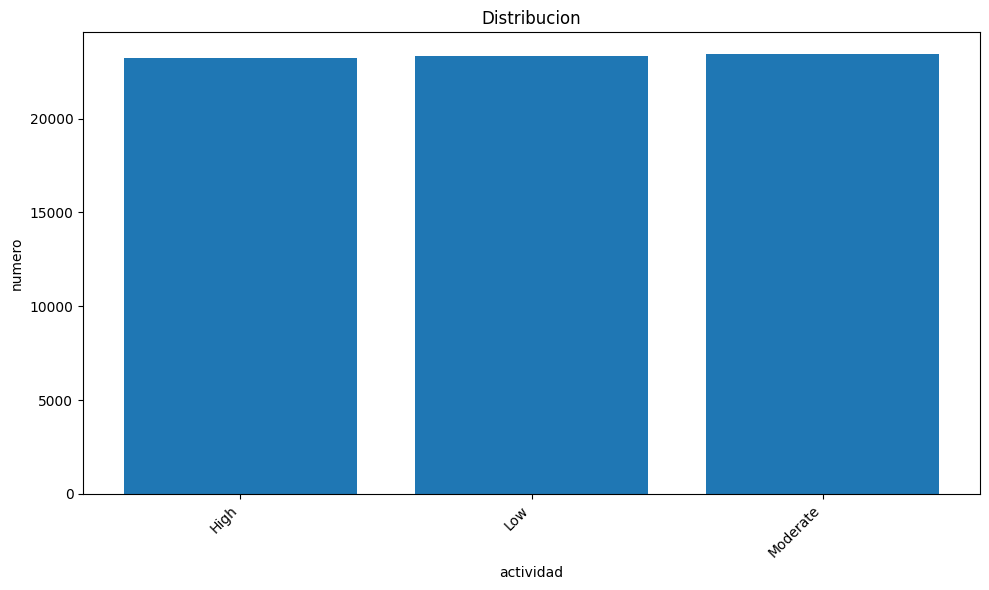

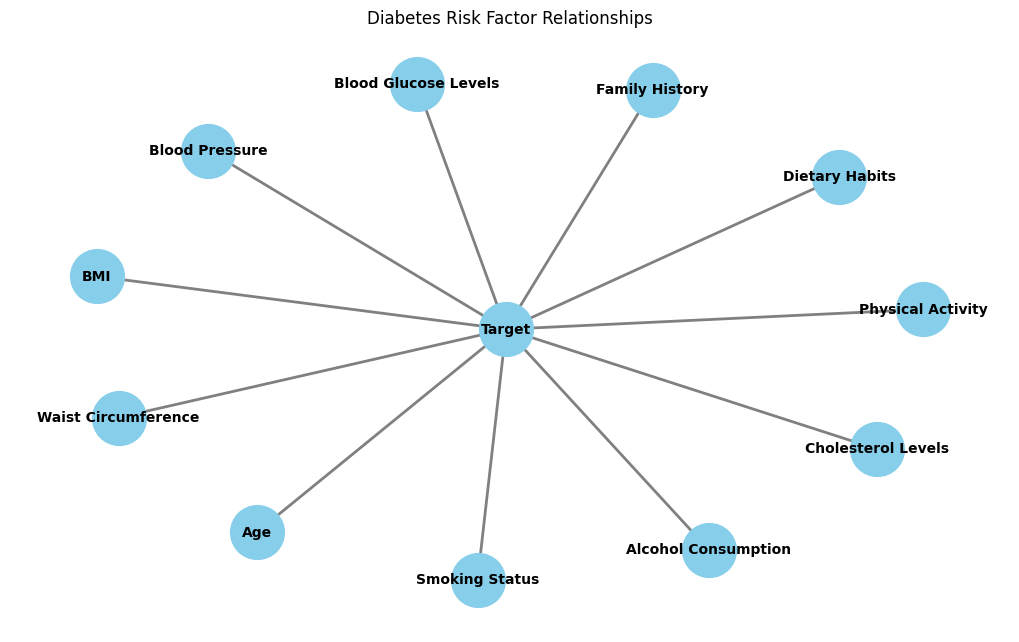

In [22]:

import matplotlib.pyplot as plt
import networkx as nx


nodes = ['Family History', 'Physical Activity', 'Age', 'BMI', 'Dietary Habits', 'Blood Pressure', 'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels', 'Smoking Status', 'Alcohol Consumption', 'Target']
edges = [('Family History', 'Target'), ('Physical Activity', 'Target'), ('Age', 'Target'), ('BMI', 'Target'), ('Dietary Habits', 'Target'), ('Blood Pressure', 'Target'), ('Cholesterol Levels', 'Target'), ('Waist Circumference', 'Target'), ('Blood Glucose Levels', 'Target'), ('Smoking Status', 'Target'), ('Alcohol Consumption', 'Target')]


graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)


plt.figure(figsize=(10, 6))
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', edge_color='gray', width=2)
plt.title("Diabetes Risk Factor Relationships")
plt.show()

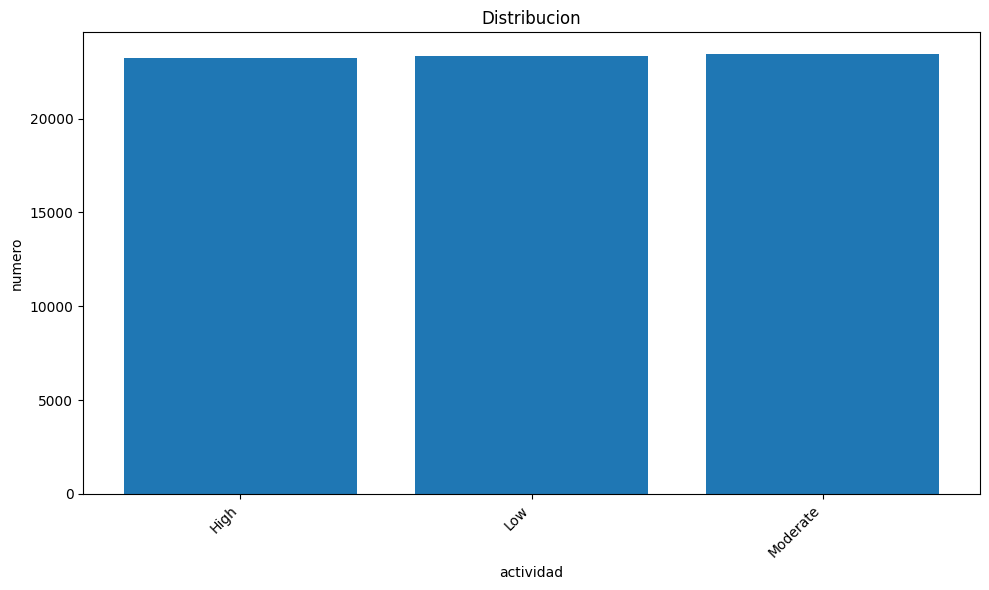

In [28]:
activity_counts = pysparkDF.groupBy('Physical Activity').count().toPandas()

plt.figure(figsize=(10, 6))
plt.bar(activity_counts['Physical Activity'], activity_counts['count'])
plt.xlabel('actividad')
plt.ylabel('numero')
plt.title('Distribucion')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()